In [3]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [4]:
data  = pd.read_csv('data.csv')
data

,no,tweet,sentimen,aspek,kesehatan,ekonomi
0,0,sebenarnya pas psbb kemarin kurang polusi udar...,1,lingkungan,0,0
1,1,kalau gue warga jakarta tuju psbb dilanjutin,1,NaN,0,0
2,2,enggak gua soal enggak tuju gua lebih penting ...,1,kesehatan,1,0
3,3,sebar virus jakarta parah banget makanya terap...,1,kesehatan,1,0
4,4,memang aneh sih hahahaha gua sangat sangat san...,1,kesehatan,1,0
...,...,...,...,...,...,...
537,537,"Ketika PSBB diperpanjang, WFH pun diperpanjang...",0,mobilitas,0,0
538,538,Perpanjangan PSBB tanpa solusi sama aja dgn li...,0,NaN,0,0
539,539,PSBB BURUK UNTUK EKONOMI (13) Ekonomi bisa jal...,1,NaN,0,0
540,540,PSBB BURUK UNTUK EKONOMI (10) Lalu siapa yang ...,1,NaN,0,0


In [30]:
!pip install Sastrawi

def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt

#casefolding
data['tweet'] = data['tweet'].str.lower()
# remove twitter handles (@user)
data['tweet'] = np.vectorize(remove_pattern)(data['tweet'], "@[\w]*")
#hapus url
data['tweet'] = data['tweet'].str.replace('http\S+|www.\S+', '', case=False)
# remove special characters, numbers, punctuations
data['tweet'] = data['tweet'].str.replace("[^a-zA-Z]", " ")
#remove short words
data['tweet'] = data['tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>1]))
#tokenisasi
tokenized_tweet = data['tweet'].apply(lambda x: x.split())
#NORMALISASI
normalizad_word = pd.read_csv("colloquial-indonesian-lexicon.csv")

normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

data['tweet_normalized'] = tokenized_tweet.apply(normalized_term)
#stopwords default sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

#nambah stopword
more_stopword = ['anies','anis','abas','baswedan','xbb','xef','kok','gua','gue','nya','kalo','kalau','jakarta','psbb','covid','corona','banget','deh','jadi','buat','apa','sih','enggak','pak','rt','xa','xb','xc','xd','xe','xf','xad','xae','xef','co','xef','iii','xaa','xab','xba', 'xef', 'byda','xbe','ek','an','amp','xaa','xbc', 'xef','xac','xbb']
stop_factory = StopWordRemoverFactory().get_stop_words() #load defaul stopword

# convert list to dictionary
indo  = stop_factory + more_stopword

print(indo)
from nltk.corpus import stopwords

# get stopword indonesia
list_stopwords = indo

# convert list to dictionary
list_stopwords = set(list_stopwords)


#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

data['tweet_filtered'] = data['tweet_normalized'].apply(stopwords_removal)
#Stemming
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

data['tweet_stemmed'] = data['tweet_filtered'].apply(lambda x: [stemmer.stem(i) for i in x])
tokenized_tweet = data['tweet_stemmed']

for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

data['tidy_tweet'] = tokenized_tweet

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
data

In [60]:
data['sentimen'].value_counts()

0    341
1    201
Name: sentimen, dtype: int64

In [58]:
data['ekonomi'].value_counts()

0    432
1    110
Name: ekonomi, dtype: int64

In [59]:
data['kesehatan'].value_counts()

0    412
1    130
Name: kesehatan, dtype: int64

In [15]:
data['aspek'].value_counts()

mobilitas     180
kesehatan     130
ekonomi       110
politik        60
lingkungan     11
Name: aspek, dtype: int64

In [32]:
#TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=10000)
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(data['tweet'])
print(tfidf.shape)
print(tfidf.size)

(542, 842)
6448


In [53]:
#SPLITTING dengan TF-IDF
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tfidf, data['sentimen'],
                                                    test_size=0.2, random_state=11)

#print size data yang displit
print("X_train_shape : ",X_train.shape)
print("X_test_shape : ",X_test.shape)
print("y_train_shape : ",y_train.shape)
print("y_test_shape : ",y_test.shape)

X_train_shape :  (433, 842)
X_test_shape :  (109, 842)
y_train_shape :  (433,)
y_test_shape :  (109,)


In [54]:
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes Classifier

model_naive = MultinomialNB().fit(X_train, y_train) 
predicted_naive = model_naive.predict(X_test)

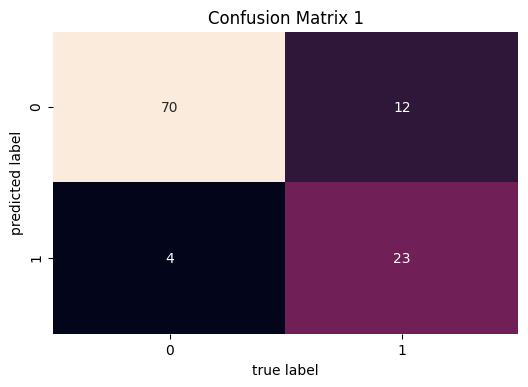

In [55]:
from sklearn.metrics import confusion_matrix

plt.figure(dpi=100)
mat = confusion_matrix(y_test, predicted_naive)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)

plt.title('Confusion Matrix 1')
plt.xlabel('true label')
plt.ylabel('predicted label')
#plt.savefig("assets/confusion_matrix.png")
plt.show()

In [56]:
from sklearn.metrics import accuracy_score

score_naive = accuracy_score(predicted_naive, y_test)
print("Accuracy with Naive-bayes: ",score_naive)

Accuracy with Naive-bayes:  0.8532110091743119


In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted_naive))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90        74
           1       0.85      0.66      0.74        35

    accuracy                           0.85       109
   macro avg       0.85      0.80      0.82       109
weighted avg       0.85      0.85      0.85       109



In [7]:
from pandas import DataFrame
import matplotlib.pyplot as plt

In [10]:
df = DataFrame(data,columns=['ekonomi'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """Entry point for launching an IPython kernel.


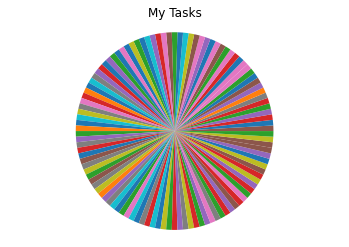

In [14]:
plt.pie(df)
plt.title('My Tasks')
plt.axis('equal')
plt.show()

KLASIFIKASI BIDANG EKONOMI

In [ ]:
#TF-IDF_E
tfidf_vectorizer_e = TfidfVectorizer(max_df=0.90, min_df=2, max_features=10000)
# TF-IDF feature matrix
tfidf_e = tfidf_vectorizer_e.fit_transform(data['tweet'])
print(tfidf_e.shape)
print(tfidf_e.size)

(503, 814)
6085


In [ ]:
#SPLITTING dengan TF-IDF
X_train_e, X_test_e, y_train_e, y_test_e = train_test_split(tfidf_e, data['ekonomi'],
                                                    test_size=0.2, random_state=2)

#print size data yang displit
print("X_train_shape : ",X_train_e.shape)
print("X_test_shape : ",X_test_e.shape)
print("y_train_shape : ",y_train_e.shape)
print("y_test_shape : ",y_test_e.shape)

X_train_shape :  (402, 814)
X_test_shape :  (101, 814)
y_train_shape :  (402,)
y_test_shape :  (101,)


In [ ]:
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes Classifier

model_naive_eko = MultinomialNB().fit(X_train_e, y_train_e) 
predicted_naive_e = model_naive_eko.predict(X_test_e)

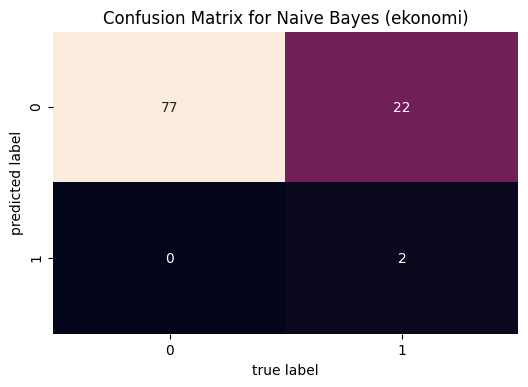

In [ ]:
from sklearn.metrics import confusion_matrix

plt.figure(dpi=100)
mat_e = confusion_matrix(y_test_e, predicted_naive_e)
sns.heatmap(mat_e.T, annot=True, fmt='d', cbar=False)

plt.title('Confusion Matrix for Naive Bayes (ekonomi)')
plt.xlabel('true label')
plt.ylabel('predicted label')
#plt.savefig("assets/confusion_matrix.png")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

score_naive_e = accuracy_score(predicted_naive_e, y_test_e)
print("Accuracy with Naive-bayes: ",score_naive_e)

Accuracy with Naive-bayes:  0.7821782178217822


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_e, predicted_naive_e))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88        77
           1       1.00      0.08      0.15        24

    accuracy                           0.78       101
   macro avg       0.89      0.54      0.51       101
weighted avg       0.83      0.78      0.70       101



KLASIFIKASI ASPEK KESEHATAN

In [ ]:
#TF-IDF_K
tfidf_vectorizer_k = TfidfVectorizer(max_df=0.90, min_df=2, max_features=10000)
# TF-IDF feature matrix
tfidf_k = tfidf_vectorizer_k.fit_transform(data['tweet'])
print(tfidf_k.shape)
print(tfidf_k.size)

(437, 754)
5385


In [ ]:
#SPLITTING dengan TF-IDF
X_train_k, X_test_k, y_train_k, y_test_k = train_test_split(tfidf_e, data['kesehatan'],
                                                    test_size=0.2, random_state=7)

#print size data yang displit
print("X_train_shape : ",X_train_e.shape)
print("X_test_shape : ",X_test_e.shape)
print("y_train_shape : ",y_train_e.shape)
print("y_test_shape : ",y_test_e.shape)

X_train_shape :  (349, 754)
X_test_shape :  (88, 754)
y_train_shape :  (349,)
y_test_shape :  (88,)


In [ ]:
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes Classifier

model_naive_k = MultinomialNB().fit(X_train_e, y_train_e) 
predicted_naive_k = model_naive_k.predict(X_test_e)

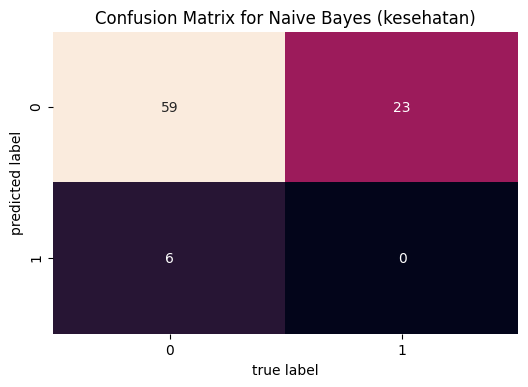

In [ ]:
from sklearn.metrics import confusion_matrix

plt.figure(dpi=100)
mat_e = confusion_matrix(y_test_k, predicted_naive_k)
sns.heatmap(mat_e.T, annot=True, fmt='d', cbar=False)

plt.title('Confusion Matrix for Naive Bayes (kesehatan)')
plt.xlabel('true label')
plt.ylabel('predicted label')
#plt.savefig("assets/confusion_matrix.png")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

score_naive_k = accuracy_score(predicted_naive_k, y_test_k)
print("Accuracy with Naive-bayes: ",score_naive_k)

Accuracy with Naive-bayes:  0.6704545454545454


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_k, predicted_naive_k))

              precision    recall  f1-score   support

           0       0.72      0.91      0.80        65
           1       0.00      0.00      0.00        23

    accuracy                           0.67        88
   macro avg       0.36      0.45      0.40        88
weighted avg       0.53      0.67      0.59        88

